### Instructions

1. Watch the video located [here](https://www.youtube.com/watch?v=uQj5UNhCPuo) and read the tutorial [here](https://www.tutorialspoint.com/genetic_algorithms/index.htm) on genetic algorithms.

2. The file *cities.txt* contains the longitude and latitude of 52 fictional cities. Use ChatGPT to generate Python code for a genetic algorithm to find good (but not necessarily optimal) routes that visit each city exactly once. The problem of finding the shortest route that visits a list of cities exactly once is called The Traveling Salesman Problem.  For a history of this problem, see [Computer Scientists Break Traveling Salesperson Record](https://www.quantamagazine.org/computer-scientists-break-traveling-salesperson-record-20201008/).

3. At a minimum, your code should:

	a. Allow the user to control parameters such as population size, number of generations, elitism rate, and mutation rate.
    
    b. Plot the cities and the best route.
    
    c. Plot fitness (i.e. route distance) by generation.  
    
3. Run the algorithm for different combinations of the parameters. Print the map and fitness plot for the best route.

3. Write 2-3 paragraphs (you may use ChatGPT for this too!) summarizing:

	a. how the algorithm works to include parent selection, crossover, and mutation
    
    b. your results and observation of running the algorithm for different parameters 

3. You do not need to document ChatGPT assistant and the articles above.  You must document other assistance in accordance with _Documentation of Academic Work_ .  Submit a cover sheet and documentation by saving your documentation to a pdf and placing it inside the folder for this homework.



In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from IPython.display import clear_output
from scipy.spatial.distance import pdist, squareform

# Read the cities data into a DataFrame
cities_df = pd.read_csv('cities.txt')


In [12]:
# Define the Genetic Algorithm
class GeneticAlgorithm:
    def __init__(self, cities, population_size=100, num_generations=1000, elitism_rate=0.1, mutation_rate=0.01):
        self.cities = cities
        self.population_size = population_size
        self.num_generations = num_generations
        self.elitism_rate = elitism_rate
        self.mutation_rate = mutation_rate
        self.distance_matrix = self.create_distance_matrix()
        self.population = self.initialize_population()
        self.best_route = None
        self.best_distance = float('inf')
        self.fitness_history = []

    def create_distance_matrix(self):
        coords = self.cities[['latitude', 'longitude']].to_numpy()
        return squareform(pdist(coords, 'euclidean'))

    def initialize_population(self):
        return [random.sample(range(len(self.cities)), len(self.cities)) for _ in range(self.population_size)]

    def calculate_route_distance(self, route):
        return sum([self.distance_matrix[route[i], route[i+1]] for i in range(len(route) - 1)])

    def evaluate_population(self):
        fitness = []
        for route in self.population:
            distance = self.calculate_route_distance(route)
            fitness.append((route, distance))
        return sorted(fitness, key=lambda x: x[1])

    def select_parents(self, sorted_population):
        num_elites = int(self.elitism_rate * self.population_size)
        return sorted_population[:num_elites]

    def crossover(self, parent1, parent2):
        child = [-1] * len(parent1)
        start, end = sorted(random.sample(range(len(parent1)), 2))
        child[start:end] = parent1[start:end]

        for city in parent2:
            if city not in child:
                for i in range(len(child)):
                    if child[i] == -1:
                        child[i] = city
                        break
        return child

    def mutate(self, route):
        if random.random() < self.mutation_rate:
            i, j = random.sample(range(len(route)), 2)
            route[i], route[j] = route[j], route[i]
        return route

    def create_new_population(self, elites):
        new_population = [elite[0] for elite in elites]
        while len(new_population) < self.population_size:
            parent1, parent2 = random.sample(elites, 2)
            child = self.crossover(parent1[0], parent2[0])
            child = self.mutate(child)
            new_population.append(child)
        return new_population

    def find_best_route(self):
        for generation in range(self.num_generations):
            sorted_population = self.evaluate_population()
            if sorted_population[0][1] < self.best_distance:
                self.best_distance = sorted_population[0][1]
                self.best_route = sorted_population[0][0]

            self.fitness_history.append(self.best_distance)
            elites = self.select_parents(sorted_population)
            self.population = self.create_new_population(elites)


    # Real-time animations showing the evolution of routes over generations could provide deeper insights into the GA's operation and the optimization process.
    # --------------------------------------------------------------------------------------------------------------------------------------------------------
    # def find_best_route(self):
    #     for generation in range(self.num_generations):
    #         sorted_population = self.evaluate_population()
    #         if sorted_population[0][1] < self.best_distance:
    #             self.best_distance = sorted_population[0][1]
    #             self.best_route = sorted_population[0][0]
    # 
    #         self.fitness_history.append(self.best_distance)
    #         elites = self.select_parents(sorted_population)
    #         self.population = self.create_new_population(elites)
    # 
    #         # Visualization of the best route at this generation
    #         self.plot_generation_route(generation, sorted_population[0][0])
    # 
    # def plot_generation_route(self, generation, route):
    #     clear_output(wait=True)
    #     plt.figure(figsize=(10, 5))
    # 
    #     # Plotting the route
    #     for i in range(len(route) - 1):
    #         city1 = route[i]
    #         city2 = route[i + 1]
    #         plt.plot([self.cities.iloc[city1].longitude, self.cities.iloc[city2].longitude],
    #                  [self.cities.iloc[city1].latitude, self.cities.iloc[city2].latitude], 'b')
    #         plt.scatter(self.cities.longitude, self.cities.latitude)
    #         plt.text(self.cities.iloc[city1].longitude, self.cities.iloc[city1].latitude, self.cities.iloc[city1].city)
    # 
    #     plt.title(f"Generation: {generation}, Best Distance: {self.best_distance:.2f}")
    #     plt.pause(0.1)  # Pause to update the plot
    #     plt.show()

    def plot_route(self):
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.title("Best Route")
        for i in range(len(self.best_route) - 1):
            city1 = self.best_route[i]
            city2 = self.best_route[i + 1]
            plt.plot([self.cities.iloc[city1].longitude, self.cities.iloc[city2].longitude],
                     [self.cities.iloc[city1].latitude, self.cities.iloc[city2].latitude], 'b')
            plt.scatter(self.cities.longitude, self.cities.latitude)
            plt.text(self.cities.iloc[city1].longitude, self.cities.iloc[city1].latitude, self.cities.iloc[city1].city)

        plt.subplot(1, 2, 2)
        plt.title("Fitness Over Generations")
        plt.plot(self.fitness_history)
        plt.xlabel("Generation")
        plt.ylabel("Distance")
        plt.show()
    



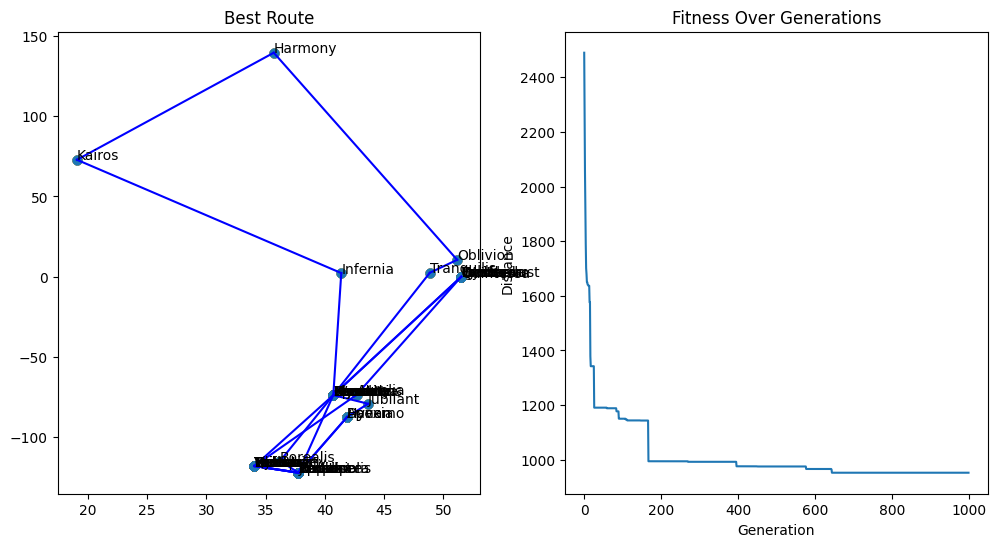

In [13]:

# Create an instance of the GeneticAlgorithm class
ga = GeneticAlgorithm(cities_df, population_size=100, num_generations=1000, elitism_rate=0.1, mutation_rate=0.01)

# Run the algorithm
ga.find_best_route()

# Plot the best route and fitness history
ga.plot_route()

The Genetic Algorithm (GA) applied to the Traveling Salesman Problem (TSP) operates through a series of evolutionary steps to find a good route that visits each city once. Initially, a population of random routes is generated. Each route represents a potential solution, or an 'individual', in the problem space. The algorithm then evaluates these individuals based on a fitness function, which, in the case of TSP, is usually the total distance of the route: shorter routes are deemed fitter. 

Parent selection, crossover, and mutation are crucial mechanisms in GA. Parent selection involves choosing the fittest routes from the current population to pass their 'genes' (route segments) to the next generation. This is often done using elitism, where a portion of the best routes is automatically carried over to the next generation. Crossover, the GA's core, involves combining segments of these selected parent routes to create new offspring routes. This mimics biological reproduction, where offspring inherit traits from both parents. Mutation, on the other hand, introduces random changes to some routes. This step is crucial for maintaining genetic diversity in the population, preventing premature convergence to suboptimal solutions. A carefully controlled mutation rate ensures that the algorithm explores a broad range of solutions.

In running the algorithm with different parameters, it's observed that the population size, number of generations, elitism rate, and mutation rate significantly influence the algorithm's performance and the quality of the solutions. A larger population size and more generations allow for a broader exploration of the solution space, potentially leading to better solutions but at the cost of increased computational time. The elitism rate ensures that the best solutions are retained, but setting it too high can lead to a lack of diversity and stagnation. Conversely, a high mutation rate can introduce too much randomness, leading away from optimal solutions. The key is to find a balanced set of parameters where the algorithm efficiently converges to a good solution. Typically, a combination of a moderate population size, sufficient number of generations, a low but non-zero mutation rate, and a moderate elitism rate yields good results. Observations show that these settings lead to a gradual decrease in the total route distance over generations, indicating the algorithm's effectiveness in optimizing the TSP solution.